# Capstone Project - Google Predictive Analytics

## Part_5: Correlations and Modeling 

### Performs some more EDA and Modeling using only numerical values

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../capstone_data/kaggle_data/df_combined_tables.csv")

In [4]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,deviceCategory,operatingSystem,...,campaign,isTrueDirect,keyword,referralPath,source,bounces,hits,newVisits,pageviews,transactionRevenue
0,Organic Search,1970-01-01 00:00:00.020160902,1.131660e+18,1.131660e+28,1472830385,1,1472830385,Chrome,desktop,Windows,...,(not set),-999,(not provided),-999,google,1,1,1,1,0.0
1,Organic Search,1970-01-01 00:00:00.020160902,3.773060e+17,3.773060e+27,1472880147,1,1472880147,Firefox,desktop,Macintosh,...,(not set),-999,(not provided),-999,google,1,1,1,1,0.0
2,Organic Search,1970-01-01 00:00:00.020160902,3.895546e+18,3.895546e+28,1472865386,1,1472865386,Chrome,desktop,Windows,...,(not set),-999,(not provided),-999,google,1,1,1,1,0.0
3,Organic Search,1970-01-01 00:00:00.020160902,4.763447e+18,4.763447e+28,1472881213,1,1472881213,UC Browser,desktop,Linux,...,(not set),-999,google + online,-999,google,1,1,1,1,0.0
4,Organic Search,1970-01-01 00:00:00.020160902,2.729444e+16,2.729444e+26,1472822600,2,1472822600,Chrome,mobile,Android,...,(not set),True,(not provided),-999,google,1,1,0,1,0.0


In [5]:
df.describe()

,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,bounces,hits,newVisits,pageviews,transactionRevenue
count,9.036530e+05,9.036530e+05,9.036530e+05,903653.000000,9.036530e+05,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000
mean,4.505845e+18,4.505845e+28,1.485007e+09,2.264897,1.485007e+09,0.498676,4.596538,0.778020,3.849338,1.704273
std,3.071128e+18,3.071128e+28,9.022124e+06,9.283735,9.022124e+06,0.499999,9.641437,0.415578,7.025002,52.778659
min,4.823595e+12,4.823595e+22,1.470035e+09,1.000000,1.470035e+09,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.593048e+18,1.593048e+28,1.477561e+09,1.000000,1.477561e+09,0.000000,1.000000,1.000000,1.000000,0.000000
50%,4.388191e+18,4.388191e+28,1.483949e+09,1.000000,1.483949e+09,0.000000,2.000000,1.000000,1.000000,0.000000
75%,7.194903e+18,7.194903e+28,1.492759e+09,1.000000,1.492759e+09,1.000000,4.000000,1.000000,4.000000,0.000000
max,5.198308e+19,5.198308e+29,1.501657e+09,395.000000,1.501657e+09,1.000000,500.000000,1.000000,469.000000,23129.500000


In [6]:
df.corr()

,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,bounces,hits,newVisits,pageviews,transactionRevenue
fullVisitorId,1.000000,1.000000,-0.000964,-0.023941,-0.000964,-0.001235,-0.000183,0.001149,0.000049,-0.000061
sessionId,1.000000,1.000000,-0.000964,-0.023941,-0.000964,-0.001235,-0.000183,0.001149,0.000049,-0.000061
visitId,-0.000964,-0.000964,1.000000,0.002069,1.000000,-0.000131,-0.027701,-0.041035,-0.022262,0.002724
visitNumber,-0.023941,-0.023941,0.002069,1.000000,0.002069,-0.023754,0.041317,-0.255077,0.043332,0.051366
visitStartTime,-0.000964,-0.000964,1.000000,0.002069,1.000000,-0.000131,-0.027701,-0.041035,-0.022262,0.002724
bounces,-0.001235,-0.001235,-0.000131,-0.023754,-0.000131,1.000000,-0.371136,0.078841,-0.404527,-0.032206
hits,-0.000183,-0.000183,-0.027701,0.041317,-0.027701,-0.371136,1.000000,-0.115202,0.983201,0.154333
newVisits,0.001149,0.001149,-0.041035,-0.255077,-0.041035,0.078841,-0.115202,1.000000,-0.117150,-0.041164
pageviews,0.000049,0.000049,-0.022262,0.043332,-0.022262,-0.404527,0.983201,-0.117150,1.000000,0.155589
transactionRevenue,-0.000061,-0.000061,0.002724,0.051366,0.002724,-0.032206,0.154333,-0.041164,0.155589,1.000000


In [7]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

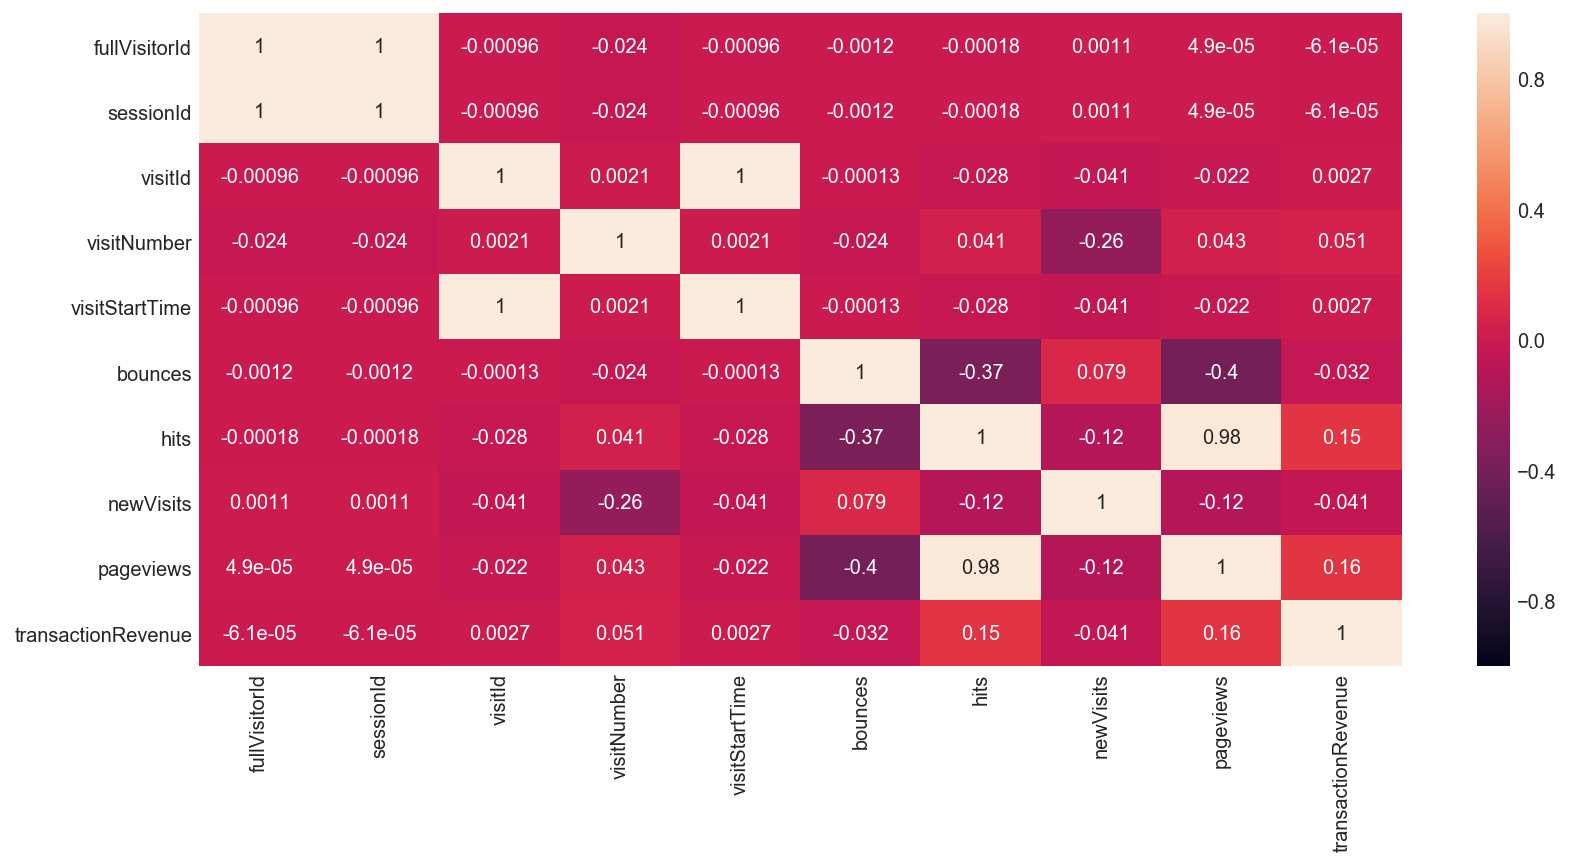

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

>From the correlation heatmap, we see that transactionRevenue has a strong correlation with hits and pageviews, howerver, pageviews has a much stronger correlation with hits. 

#### Creating a basic model using only the numerical values of df.

In [9]:
y = df['transactionRevenue']
X = df.drop(['transactionRevenue'], axis=1)

In [10]:
X.corrwith(y).sort_values(ascending = False)

pageviews         0.155589
hits              0.154333
visitNumber       0.051366
visitStartTime    0.002724
visitId           0.002724
fullVisitorId    -0.000061
sessionId        -0.000061
bounces          -0.032206
newVisits        -0.041164
dtype: float64

In [11]:
X_numeric = X._get_numeric_data()

#### Train_test_split and model with Linear Regression

In [12]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [13]:
ss = StandardScaler()
ss.fit(X_numeric)

X_s = ss.transform(X_numeric)

X_s

array([[-1.09867985, -1.09867985, -1.34967236, ..., -0.37302941,
         0.5341481 , -0.40559985],
       [-1.3443078 , -1.3443078 , -1.34415681, ..., -0.37302941,
         0.5341481 , -0.40559985],
       [-0.19872143, -0.19872143, -1.3457929 , ..., -0.37302941,
         0.5341481 , -0.40559985],
       ...,
       [ 0.40334774,  0.40334774, -0.16413607, ...,  2.01250841,
         0.5341481 ,  2.44137601],
       [-0.58496112, -0.58496112, -0.15677383, ...,  2.01250841,
         0.5341481 ,  2.58372481],
       [-1.20182126, -1.20182126, -0.15881138, ...,  2.73854166,
         0.5341481 ,  3.86486395]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, random_state=42)

In [15]:
# X_train.corrwith(y_train).sort_values()

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.027090901576080295, 0.029189809594483695)

In [18]:
# pipe = Pipeline([
#     #('pf', PolynomialFeatures()),
#     ('ss', StandardScaler()),
#     ('lr', LinearRegression())
# ])

# pipe.fit(X_train, y_train)

# print(pipe.score(X_train, y_train))
# print(pipe.score(X_test, y_test))

##### Using Ridge and lasso regressing

In [19]:
rcv = RidgeCV(alphas=np.logspace(0, 5,100), cv = 3)

rcv.fit(X_train, y_train)

rcv.score(X_train, y_train), rcv.score(X_test, y_test)

(0.02679019121269599, 0.028680174548972093)

In [20]:
lcv = LassoCV(cv=3)

lcv.fit(X_train, y_train)

lcv.score(X_train, y_train), lcv.score(X_test, y_test)

(0.027089164390251996, 0.029184380531635412)

In [21]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train, lcv.predict(X_train)) ** 0.5)
print (mean_squared_error(y_test, lcv.predict(X_test)) ** 0.5)  

52.885179478075145
49.44385631818874
